Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 5.21

Conditional probability density function of an entry of a Gaussian random vector, given another entry, depending on the correlation coefficient parameter\
Topics and relevant videos: [Conditional distribution](https://www.youtube.com/watch?v=BNh0rcLBykA), [Gaussian random vectors](https://www.youtube.com/watch?v=adr_EwRaLbk), [Gaussian conditionals](https://www.youtube.com/watch?v=NT-CpmEcQWQ)

Author: Carlos Fernandez-Granda

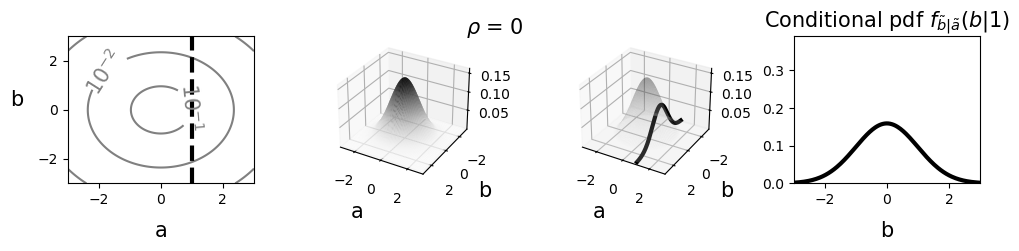

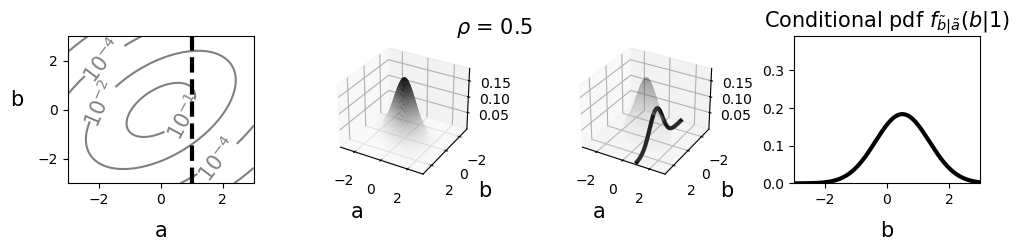

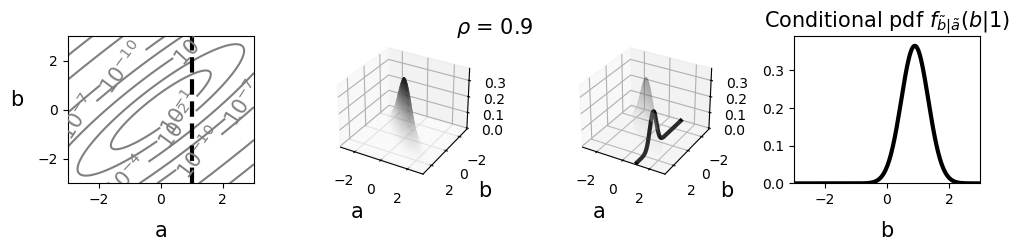

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D

font_size = 15
font_size_ticks = 15

xmin = -3
xmax = 3
ymin = -3
ymax = 3
zmin = 0
zmax = 0.3
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax,200)

def gaussian(x,y,rho):
    return (np.exp(-( x**2 - 2*rho*x*y + y**2)/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

def gaussian_cond(x,y,rho):
    return (np.exp(-( (y-rho * x)**2 )/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

X, Y = np.meshgrid(x, y)

rho_vals = [0,0.5,0.9]
level_list = [1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1]
cond_val = 1.0
f_max = 0.39

for ind,rho in enumerate(rho_vals):
    Z = gaussian(X, Y,rho)

    fig, axes = plt.subplots(1, 4, figsize=(10,3),width_ratios=[1,1,1,1])

    fig.suptitle(r"$\rho$ = " + str(rho),fontsize=font_size,y = 0.8)
    
    CS = axes[0].contour(X, Y, Z, levels = level_list,colors='gray')
    fmt = {}
    strs = [r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$','0.25']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    axes[0].clabel(CS, fontsize=font_size, inline=1,fmt=fmt)
    axes[0].vlines(cond_val,ymin,ymax,lw=3,ls="dashed",color="black")
    axes[0].set_xlabel("a", fontsize=font_size,labelpad=10)
    h = axes[0].set_ylabel("b", fontsize=font_size,labelpad=15)
    h.set_rotation(0)
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([xmin,xmax])
    
    axes[1].remove()
    ax1 = fig.add_subplot(1, 4, 2, projection='3d')
    z_cond = gaussian(cond_val, y,rho)
    ax1.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='Greys',alpha=1,edgecolor='none',rasterized=True)
    ax1.set_xticks([-2,0,2]) 
    ax1.set_yticks([-2,0,2])
    ax1.set_ylim([ymax,ymin])
    ax1.set_xlim([xmin,xmax])
    ax1.set_ylabel('b',fontsize=font_size,labelpad = 5)
    ax1.set_xlabel('a',fontsize=font_size,labelpad = 5)
    
    axes[2].remove()
    ax2 = fig.add_subplot(1, 4, 3, projection='3d')
    z_cond = gaussian(cond_val, y,rho)
    ax2.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='Greys',alpha=0.2,edgecolor='none',rasterized=True)
    ax2.set_xticks([-2,0,2]) 
    ax2.set_yticks([-2,0,2])
    ax2.plot(cond_val*np.ones(len(x)), y, z_cond,lw=3,color="black",alpha=1)
    ax2.set_ylim([ymax,ymin])
    ax2.set_xlim([xmin,xmax])
    ax2.set_ylabel('b',fontsize=font_size,labelpad = 5)
    ax2.set_xlabel('a',fontsize=font_size,labelpad = 5)
    
    axes[3].plot(y,gaussian_cond(cond_val,y,rho),color="black",lw=3)
    axes[3].set_xlim([xmin,xmax])
    axes[3].set_ylim([0,f_max])
    axes[3].set_xlabel("b", fontsize=font_size,labelpad=10)
    axes[3].set_title(r"Conditional pdf $f_{\tilde{b}|\tilde{a}}(b|1)$", fontsize=font_size,pad=5)
    plt.tight_layout();

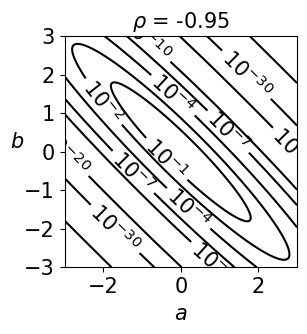

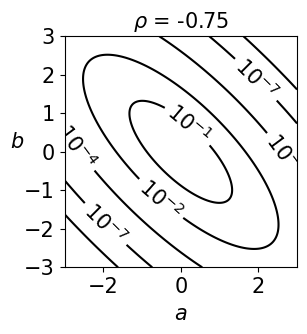

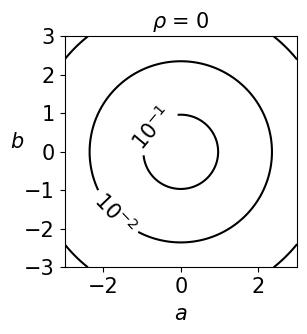

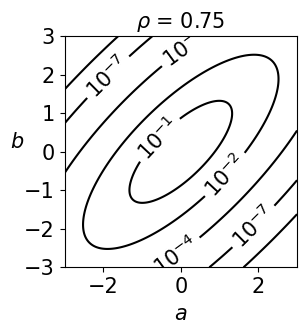

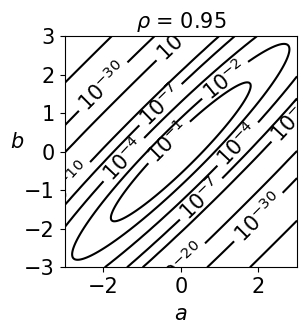

In [2]:
rho_vals = [-0.95,-0.75,0,0.75,0.95]
level_list = [1e-50,1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1]
cond_val = 1.0
f_max = 0.39

for ind,rho in enumerate(rho_vals):
    Z = gaussian(X, Y,rho)

    fig = plt.figure(figsize = (3,3)) 
    CS = plt.contour(X, Y, Z, levels = level_list,colors='black')
    fmt = {}
    strs = [r'$10^{-50}$',r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    plt.clabel(CS, fontsize=font_size, inline=1,fmt=fmt)
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.xlabel(r"$a$", fontsize=font_size,labelpad=5)
    h = plt.ylabel(r"$b$", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    plt.title(r"$\rho$ = " + str(rho), fontsize=font_size);